In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [10]:
df = pd.read_csv('data.csv', sep='~', encoding = 'utf-8', usecols=['ContingentUnit' ,'Start', 'End', 'EducatorAssignment', 'LocationsDisplayText', 'Subject'])
df.columns = ['Start', 'End', 'Номер группы', 'Преподаватель', 'Адрес', 'Предмет']
df['Предмет'].apply(str);
df['Вид занятия']=df['Предмет'].str.split(',').str.get(1)
df['Предмет']=df['Предмет'].str.split(',').str.get(0)
df['День'] = df['Start'].str.split(' ').str.get(0)
df['Время начала'] = df['Start'].str.split(' ').str.get(1)
df['Время окончания'] = df['End'].str.split(' ').str.get(1)
df = df[['Номер группы', 'Преподаватель', 'Адрес', 'Предмет', 'Вид занятия', 'День', 'Время начала', 'Время окончания']]
df.head(20)

,Номер группы,Преподаватель,Адрес,Предмет,Вид занятия,День,Время начала,Время окончания
0,2653BA9C-C524-46CD-BCE7-CCE24CA92DB9,724FF90E-ECFD-479F-91B0-5D6B60776DB8,"В.О., Университетская наб., д. 7-9-11, лит. А,...",Алгоритмы в биоинформатике,лекция,2018-09-29,10:50:00.000,12:30:00.000
1,2653BA9C-C524-46CD-BCE7-CCE24CA92DB9,724FF90E-ECFD-479F-91B0-5D6B60776DB8,"В.О., Университетская наб., д. 7-9-11, лит. А,...",Алгоритмы в биоинформатике,лекция,2018-09-22,10:50:00.000,12:30:00.000
2,8C7F8906-0816-4300-9EDF-8283B99AE88E,7CA0F2E2-BB52-4AC2-BB60-6ABB2D8DD49E,"В.О., 6 линия, д. 15, 212",Мультимедийные технологии в дизайне,лекция,2018-09-05,10:30:00.000,12:00:00.000
3,8C7F8906-0816-4300-9EDF-8283B99AE88E,7CA0F2E2-BB52-4AC2-BB60-6ABB2D8DD49E,"В.О., 6 линия, д. 15, 212",Мультимедийные технологии в дизайне,лекция,2018-09-19,10:30:00.000,12:00:00.000
4,8C7F8906-0816-4300-9EDF-8283B99AE88E,7CA0F2E2-BB52-4AC2-BB60-6ABB2D8DD49E,"В.О., 6 линия, д. 15, 212",Мультимедийные технологии в дизайне,лекция,2018-09-26,10:30:00.000,12:00:00.000
5,4DE53F02-AFB7-4ED7-9001-159B71CFA7A2,D8F9D802-AE63-4866-B6BD-36BC700CD898,"ул. Кораблестроителей, д. 20, лит. А, Спортивн...",гимнастика,практическое занятие,2018-09-05,12:05:00.000,12:50:00.000
6,4DE53F02-AFB7-4ED7-9001-159B71CFA7A2,D8F9D802-AE63-4866-B6BD-36BC700CD898,"ул. Кораблестроителей, д. 20, лит. А, Спортивн...",гимнастика,практическое занятие,2018-09-12,12:05:00.000,12:50:00.000
7,D3DE1540-1472-491B-8763-D9CC6ECDC679,8FC46953-C0B6-4C50-BD00-DC55B0913152,"ул. Ульяновская, д. 1, корп. М, 426",Электив. Оптика рентгеновских лучей,лекция,2018-09-14,11:10:00.000,12:45:00.000
8,D3DE1540-1472-491B-8763-D9CC6ECDC679,8FC46953-C0B6-4C50-BD00-DC55B0913152,"ул. Ульяновская, д. 1, корп. М, 426",Электив. Оптика рентгеновских лучей,лекция,2018-09-21,11:10:00.000,12:45:00.000
9,D3DE1540-1472-491B-8763-D9CC6ECDC679,8FC46953-C0B6-4C50-BD00-DC55B0913152,"ул. Ульяновская, д. 1, корп. М, 426",Электив. Оптика рентгеновских лучей,лекция,2018-09-28,11:10:00.000,12:45:00.000


# Список преподавателей, обучающих выбранную группу/ведущих выбранную дисциплину

In [12]:
# Ввод номера группы
number = input()
print(pd.unique(df[df['Номер группы'] == number]['Преподаватель']))

EBBC8511-04FF-4C4D-BC58-4944E48EC50E
['EC31CDEE-96AD-470F-B830-B1D9C9F6573B'
 'F1131678-55B5-4034-B40C-A9593BC119BA'
 '2A7FB40B-3077-4AD3-8770-78DE761BC2EB']


In [13]:
# Ввод дисциплины 
lesson = input()
print(pd.unique(df[df['Предмет'] == lesson]['Преподаватель']))

История русской журналистики
['777745BB-06DE-4EB7-8DEB-DBE46F95FD03'
 'A4E01033-F8CA-4BB3-B616-E297768C358A'
 'E9AFA529-56B0-4378-82AB-A8085DB3149F'
 'EBA75C17-A501-4DAE-B597-A67A005FA7AE'
 '840EE549-50DA-4DBE-A30D-0E2EE81E594C'
 '47811819-E89C-48C6-89FF-FEBE6F9D068D'
 'C07E68E1-4BF1-44EE-A40E-C7F57B268DB3'
 '95DD2292-EC44-4FEB-BE6B-43A98D1BB7FC'
 '587D98EB-9BF8-4EF4-91F2-92DDD514BB6B'
 '0E729523-A3C3-45BF-9A2A-22CC96EB518B'
 '0683761C-44D7-40F3-8BF1-F29E854ED92D'
 '12BEB76E-FB5B-4F3D-A37C-633B8252C04B'
 'D359C7F8-4200-49FD-B4BE-2310D0C07D97'
 'A660DEF7-7A22-4702-BAFC-8BFAB4140242'
 'F8A9BEED-1080-4216-8177-3D8FB56CECEC'
 '94DB49BD-5B4B-421E-A1A4-19395321984D']


# Общая занятость преподавателей на факультете/в университете

# Занятость определенных преподавателей

In [14]:
teacherName = input()

C07E68E1-4BF1-44EE-A40E-C7F57B268DB3


In [15]:
# Посмотреть список всех пар преподавателя на неделе
df[df['Преподаватель'] == teacherName].head(10)

,Номер группы,Преподаватель,Адрес,Предмет,Вид занятия,День,Время начала,Время окончания
45818,DE33C641-92C6-4F3F-B1B3-FBE46DA94907,C07E68E1-4BF1-44EE-A40E-C7F57B268DB3,"В.О., 1 линия, д. 26, 206",История русской журналистики,лекция,2018-09-28,10:40:00.000,12:10:00.000
45819,DE33C641-92C6-4F3F-B1B3-FBE46DA94907,C07E68E1-4BF1-44EE-A40E-C7F57B268DB3,"В.О., 1 линия, д. 26, 206",История русской журналистики,лекция,2018-09-21,10:40:00.000,12:10:00.000
45820,DE33C641-92C6-4F3F-B1B3-FBE46DA94907,C07E68E1-4BF1-44EE-A40E-C7F57B268DB3,"В.О., 1 линия, д. 26, 206",История русской журналистики,лекция,2018-09-14,10:40:00.000,12:10:00.000
45821,DE33C641-92C6-4F3F-B1B3-FBE46DA94907,C07E68E1-4BF1-44EE-A40E-C7F57B268DB3,"В.О., 1 линия, д. 26, 206",История русской журналистики,лекция,2018-09-07,10:40:00.000,12:10:00.000


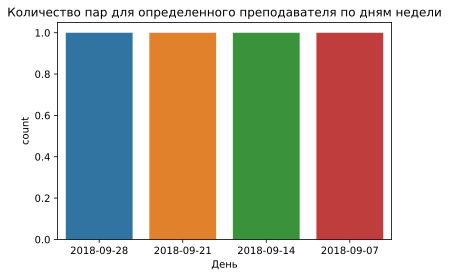

In [16]:
sns.countplot(df[df['Преподаватель'] == teacherName]['День']);
plt.title('Количество пар для определенного преподавателя по дням недели');